
1. Приоритизация гипотез.

2. Анализ A/B-теста.

**С О Д Е Р Ж А Н И Е**

<a id='content'></a>

1. [Приоритизация гипотез](#one)

    1.1. [Метод ICE](#ice)
    
    1.2. [Метод RICE](#rice)
    
    1.3. [Изменение в приоритизации гипотез](#change_hypo)
    
    
2. [Анализ A/B-теста](#abtest)
    
    2.1. [Выгрузка и проверка данных](#3.1.)
    
    2.1.1. [Предобработка данных](#3.1.1.)
    
    2.1.2. [Изучение групп на предмет равенства и наличия пользователей в обеих](#3.1.2.)
    
    2.1.3. [Подготовка данных для изучения](#3.1.3.)    
      
    2.2. [Построение графика кумулятивной выручки по группам. Выводы и предположения](#3.2.)
    
    2.3. [Построение графика кумулятивного среднего чека по группам. Выводы и предположения](#3.3.)
    
    2.4. [Построение графика относительного изменения кумулятивного среднего чека группы B к группе A. Выводы и предположения](#3.4.)
    
    2.5. [Построение графика кумулятивного среднего количества заказов на посетителя по группам. Выводы и предположения](#3.5.)
    
    2.6. [Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Выводы и предположения](#3.6.)
    
    2.7. [Построение точечного графика количества заказов по пользователям. Выводы и предположения](#3.7.)
    
    2.8. [Расчёт 95 и 99 перцентилей количества заказов на пользователя. Определение границы для отсева аномальных пользователей](#3.8.)
    
    2.9. [Построение точечного графика стоимостей заказов. Выводы и предположения](#3.9.)
    
    2.10. [Расчёт 95 и 99 перцентилей стоимости заказов. Определение границы для отсева аномальных заказов](#3.10.)
    
    2.11. [Подготовка данных для расчётов статистической значимости различий по "сырым" данным](#3.11.)
    
    2.12. [Расчёт статзначимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Выводы и предположения](#3.12.)
    
    2.13. [Расчёт статзначимости различий в среднем чеке заказа между группами по «сырым» данным. Выводы и предположения](#3.13.)
    
    2.14. [Подготовка "чистых" данных](#3.14.)
    
    2.15. [Расчёт статзначимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Выводы и предположения](#3.15.)
    
    2.16. [Расчёт статзначимости различий в среднем чеке заказа между группами по «очищенным» данным. Выводы и предположения](#3.16.)


3. [Решение по результатам теста и его обоснование](#4.)
    
   


# Приоритизация гипотез 
<a id='one'></a>

Имеется 9 гипотез по увеличению выручки интернет-магазина. 

ЗАДАЧИ: 

- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.

- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.

- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

In [1]:
# Import library Pandas
import pandas as pd

In [2]:
# Create dataframe from dataset with hypotheses
# in variable (var) 'hypo'
try:
    hypo = pd.read_csv('hypothesis.csv')
except:
    hypo = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
# Checking data
print(hypo)
print()
# and print all hypotheses wholly 
for i in range(len(hypo)):
    print(hypo['Hypothesis'][i])
    print()

                                          Hypothesis  Reach  Impact  \
0  Добавить два новых канала привлечения трафика,...      3      10   
1  Запустить собственную службу доставки, что сок...      2       5   
2  Добавить блоки рекомендаций товаров на сайт ин...      8       3   
3  Изменить структура категорий, что увеличит кон...      8       3   
4  Изменить цвет фона главной страницы, чтобы уве...      3       1   
5  Добавить страницу отзывов клиентов о магазине,...      3       2   
6  Показать на главной странице баннеры с актуаль...      5       3   
7  Добавить форму подписки на все основные страни...     10       7   
8  Запустить акцию, дающую скидку на товар в день...      1       9   

   Confidence  Efforts  
0           8        6  
1           4       10  
2           7        3  
3           3        8  
4           1        1  
5           2        3  
6           8        3  
7           8        5  
8           9        5  

Добавить два новых канала привлечения 

**У меня есть целых девять гипотез со всеми данными для всевозможных тестов**. 

Подсказали, как делать без цикла :) `pd.set_option('display.max_colwidth', None)` Потом применю.

In [4]:
# Deep copying dataframe. Just in case
hypo_copy = hypo.copy('deep')

In [5]:
# Change letters register
hypo.columns = hypo.columns.str.lower()

# So. Why I changed register? 
# First of all it is pep 8.
# And all project will be in copy/paste mechanics. 

## ICE
<a id='ice'></a>
В первую очередь оценим по методу ICE. 

In [8]:
hypo['ICE'] = round((hypo['impact'] * hypo['confidence']) / hypo['efforts'], 3)
pd.options.display.max_colwidth = 1
display(hypo[['hypothesis','ICE']].sort_values(by='ICE', ascending=False))


,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000


Первые места занимает тройка:

1. Запустить акцию, дающую скидку на товар в день рождения. **16.2**

2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей. **13.3(3)**

3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. **11.2**

*4 и 5 места с заметным отрывом от 3-го, однако их ICE кратно больше остальных гипотез. Потому упоминаю и их*.

4. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию. **8.0**

5. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа. **7.0**



## RICE
<a id='rice'></a>
Вторым методом оценки приоритета гипотез идёт RICE.

In [7]:
hypo['RICE'] = round((hypo['reach'] * hypo['impact'] * hypo['confidence']) \
/ hypo['efforts'], 3)

pd.options.display.max_colwidth = 1
display(hypo[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))


,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Картина несколько изменилась. Так как две гипотезы имеют равные оценки, у нас 4 места:


1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. **112.0**

2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа. **56.0**

3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей. **40.0**

3. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию. **40.0**

4. Запустить акцию, дающую скидку на товар в день рождения. **16.2**

## Изменения в приоритизации гипотез
<a id='change_hypo'></a>

Как видим из двух анализов, гипотезы в топе одни и те же, а вот их места совершенно различны. 

Метод **ICE** несёт в себе отношение произведения силы изменения и уверенности в том, что влияние именно таково, к стоимости тестирования. 


Метод **RICE** несёт в себе отношение произведения количества затрагиваемых пользователей, силы изменения и уверенности в том, что влияние именно таково, к стоимости тестирования.

<hr>

Гипотеза **Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок** занимает первое место при использовании метода RICE. *Не совсем понимаю, почему там стоит 10 в `Reach`, поскольку оставить свою почту для рассылок довольно рискованное занятие и оно обычно характерно лишь для самых преданных и лояльных клиентов. С другой стороны, при регистрации в магазине почта обычно требуется, потому в принципе гипотеза удивила несказанно*. 


Гипотеза **Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа** в методе ICE занимают лишь 5-е место, но с учётом того, как много пользователей этот вариант захватит, метод RICE оценивает гипотезу на второе по значимости место. При этом стоит отметить, что эта гипотеза в два раза менее приоритетна, чем гипотеза о форме *бытия*.


Гипотеза **Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей** заняла 3-е место по RICE. В то же время по ICE она была на втором месте с не очень большим отрывом от первого. С учётом остальных их приоритеты можно было бы посчитать почти равными. В RICE же она практически на 2/3 менее значима, чем лидирующая. Уверен, что основное дело в параметре `Reach`, коий равен всего 3.


**Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию**. Эта гипотеза делит 3-е место с каналами привлечения трафика при методе RICE, но занимает 4-е место при методе ICE. На 3-м месте она в три раза менее приоритетна, на 4-м — в два. У этой теории довольно низкие `Reach` и `Impact`, что влияет на общую картину.


Метод ICE вывел в лидеры гипотезу **Запустить акцию, дающую скидку на товар в день рождения**, а метод RICE низвёл её на 4-е место. Причина в том, что день рождения весьма личное и не одинаковое для всех явление, а потому вряд ли значение параметра `Reach` будет здесь высоким. А потому и общее значение числителя в формуле невелико. 

[К оглавлению](#content)

# Анализ A/B-теста
<a id='abtest'></a>

Имеем проведённый A/B-тест. 

**ЗАДАЧА**: проанализировать этот A/B-тест:


<details>
   <summary>Раскрыть / Скрыть</summary>
   
  
1. Построить график кумулятивной выручки по группам. Сделать выводы и предположения.


2. Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.


3. Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.


4. Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.


5. Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.


6. Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.


7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.


8. Построить точечный график стоимостей заказов. Сделать выводы и предположения.


9. Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.


10. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.


11. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.


12. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.


13. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.


14. **Принять решение по результатам теста и объяснить его. Варианты решений**:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.
</details>
<a href="#content">К оглавлению</a>

## Выгрузка и проверка данных
<a id='3.1.'></a>

In [9]:
# Import libraries for work with date 
# and math operations
import datetime as dt
import numpy as np
import scipy.stats as stats


In [10]:
# Advert vars for datasets
# orders for orders data and 
# visitors for visitors data
try:
    orders = pd.read_csv('orders.csv')
except:
    orders = pd.read_csv('/datasets/orders.csv')
print(orders.head())
print()
try:
    visitors = pd.read_csv('visitors.csv')
except:
    visitors = pd.read_csv('/datasets/visitors.csv')
print(visitors.head())

# Also display it for checking

   transactionId   visitorId        date  revenue group
0  3667963787     3312258926  2019-08-15  1650     B   
1  2804400009     3642806036  2019-08-15  730      B   
2  2961555356     4069496402  2019-08-15  400      A   
3  3797467345     1196621759  2019-08-15  9759     B   
4  2282983706     2322279887  2019-08-15  2308     B   

         date group  visitors
0  2019-08-01  A     719     
1  2019-08-02  A     619     
2  2019-08-03  A     507     
3  2019-08-04  A     717     
4  2019-08-05  A     756     


In [11]:
# Display info about dataframes
orders.info()
print()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [12]:
# Copying data. Just in case 
orders_copy = orders.copy('deep')
visitors_copy = visitors.copy('deep')

С данными всё на первый взгляд в порядке. Нужно поменять типы данных в датовых столбах.
Дубли? 

[top](#content)

### Предобработка данных
<a id='3.1.1.'></a>

In [13]:
# Checking data for duplicates
orders.nunique()

transactionId    1197
visitorId        1031
date             31  
revenue          713 
group            2   
dtype: int64

Имеем 1197 записей и 1197 уников транзакций. Всё в порядке. В таблице посетителей дубли могут быть, т. к. один и тот же юзер может в один день совершить несколько покупок. 

In [14]:
# Change the data type in date columns
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')


In [15]:
# Display new info about dataframes
orders.info()
print()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Всё поменялось. Замечательно! 

### Изучим группы:

<a id='3.1.2.'></a>
1. Можно ли сравнить группы А и В.

2. Нет ли  одного и того же пользователя в обеих группах. *Это идея не моя, её подсказали*

Разница между числом элементов групп не должна превышать 1%. 

In [16]:
# Count visitors in A & B
# and its ratio

print(visitors[visitors['group'] == 'A']['visitors'].sum() / visitors[visitors['group'] == 'B']['visitors'].sum())


0.9904842461408332


Разница между количествами наблюдений чуть менее 1%, а потому данные вполне подходят для работы.

In [17]:
# Checking for intersection of arrays
len(np.intersect1d(orders.query('group == "A"')['visitorId'].unique(), 
                   orders.query('group == "B"')['visitorId'].unique()))


58

Итак, у нас есть 58 пересечений. Могут ли эти данные сыграть роль? Удалить их можно, но в таком случае будет искажение, поскольку данные в таблице посетителей агрегированы. 

Вероятно, при сборе данных была допущена ошибка, которую сейчас, к сожалению, не исправить. Сворачиваемся. :)

Принято решение не изменять в данных ничего, но уведомить об ошибке стейкхолдеров.

Для себя: https://numpy.org/doc/stable/reference/generated/numpy.intersect1d.html, https://www.delftstack.com/ru/howto/numpy/python-numpy-intersection/

###  Подготовка данных для изучения
<a id='3.1.3.'></a>

In [18]:
# Create the dataframe with date and
# group label without duplicates
datesGroups = orders[['date','group']].drop_duplicates()

In [19]:
# Create the dataframe with info:
# date, group, trans and total revenue
# grouped by dates
ordersAggregated = (datesGroups
                    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],
                                                           orders['group'] == x['group'])]
                    .agg({'date' : 'max',
                          'group' : 'max',
                          'transactionId' : 'nunique',
                          'transactionId' : 'nunique',
                          'revenue' : 'sum'}), 
                           axis=1)
                    .sort_values(by=['date','group'])
                   )
ordersAggregated.head()

,date,group,transactionId,revenue
55,2019-08-01,A,24,148579
66,2019-08-01,B,21,101217
175,2019-08-02,A,44,242401
173,2019-08-02,B,45,266748
291,2019-08-03,A,68,354874


In [20]:
# Create the dataframe with info:
# date, group and total visitors
# grouped by dates

visitorsAggregated = (datesGroups
                      .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                               visitors['group'] == x['group'])]
                      .agg({'date' : 'max',
                            'group' : 'max',
                            'visitors' : 'sum'}), axis=1)
                      .sort_values(by=['date','group'])
                     )
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [21]:
# Join received earlier tables 
# in one on two columns (date & group)
# and rename columns

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=
['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'transactions', 'revenue', 'visitors']
cumulativeData.head()

,date,group,transactions,revenue,visitors
0,2019-08-01,A,24,148579,719
1,2019-08-01,B,21,101217,713
2,2019-08-02,A,44,242401,1338
3,2019-08-02,B,45,266748,1294
4,2019-08-03,A,68,354874,1845


[top](#content)

## Построение графика кумулятивной выручки по группам. Выводы и предположения.
<a id='3.2.'></a>

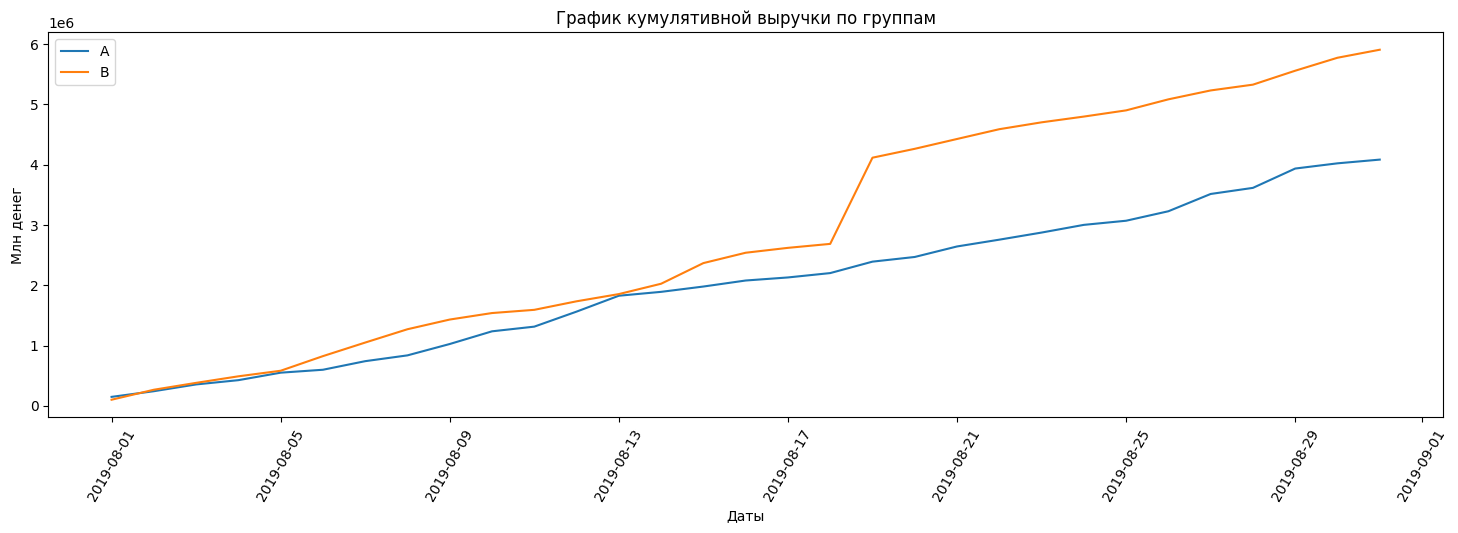

In [22]:
# Import library for building plots
import matplotlib.pyplot as plt

# Create dataframes for building plots
# Dataframe with cumulative transactions & revenue for group A by days
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A']
[['date','revenue', 'transactions']]

# Dataframe with cumulative transactions & revenue for group B by days
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B']
[['date','revenue', 'transactions']]

# Building plot revunue for А
plt.figure(figsize=(18, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Building plot revunue for B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation = 60)
plt.xlabel('Даты')
plt.ylabel('Млн денег')
plt.title("График кумулятивной выручки по группам")
plt.legend()
plt.show()

График кумулятивной выручки говорит, что мы рост выручки идёт равномерно. Однако в период с 17 до 21 августа в группе B произошёл резкий скачок. Далее рост идёт столь же равномерно, как и у группы A. 

На первый взгляд, если не брать скачок, различий нет. 

Скачок может быть связан с тем, что в группу B попал некий крупный покупатель, купивший или очень много, или очень дорого. 

## Построение графика кумулятивного среднего чека по группам. Выводы и предположения.
<a id='3.3.'></a>

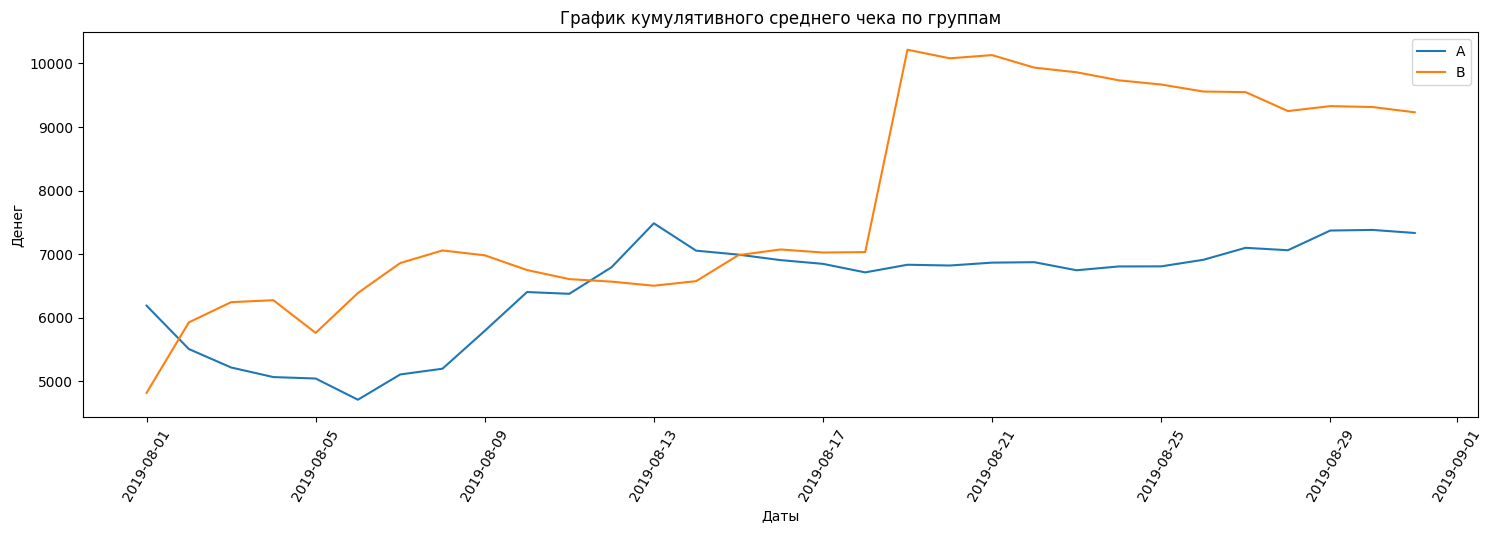

In [23]:
# Building plot revunue for А
plt.figure(figsize=(18, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] \
         / cumulativeRevenueA['transactions'], label='A')

# Building plot revunue for B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] \
         / cumulativeRevenueB['transactions'], label='B')
plt.xticks(rotation = 60)
plt.xlabel('Даты')
plt.ylabel('Денег')
plt.title("График кумулятивного среднего чека по группам")
plt.legend()
plt.show()

На графике сравнения средних чеков обеих групп заметна разница. В начале эксперимента чек группы А просел. В то же время в группе B средний чек вырос. Разница не существенная на первый взгляд. Далее наблюдаем резкий рост чека по группе A с последующим занятием ровных позиций. 

Группа B имеет резкий скачок в ранее указнные даты с 17 по 21 августа. По этому графику примерно 18-18 числа. А затем имеет тенденцию к довольно плавному снижению. 

График обрывается на 1 сентября, и не очень ясно, было бы снижение и дальше или позиция устаканится. Пока что разница в чеке существенная. В районе 2000 рублей. 

## Построение графика относительного изменения кумулятивного среднего чека группы B к группе A. Выводы и предположения.
<a id='3.4.'></a>

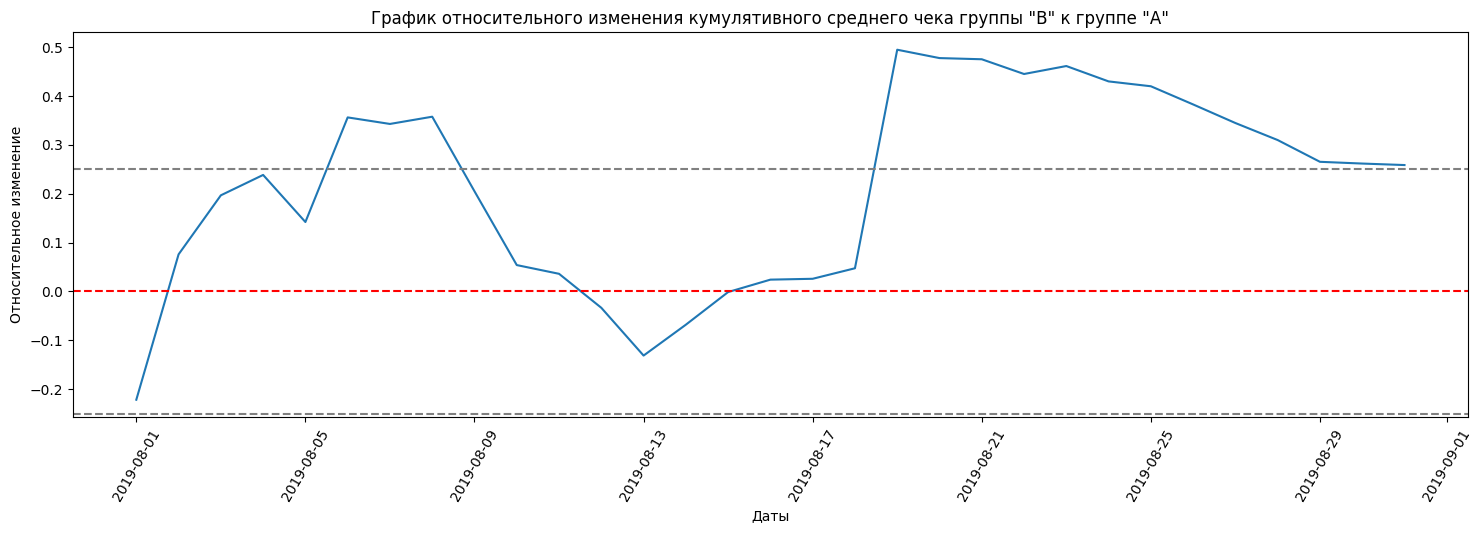

In [24]:
# Aggregating data in one frame
# by joining frames cumulativeRevenueA 
# and cumulativeRevenueB by date 
# Add suffixes for seperate on A & B
mergedCumulativeRevenue = (cumulativeRevenueA
                           .merge(cumulativeRevenueB, 
                                  left_on='date', 
                                  right_on='date', 
                                  how='left', 
                                  suffixes=['A', 'B'])
                          )

# Building ratio mean checks 
# In X we have date
# in Y — ratio of two ratios:
# ratio revenue of B and transactions of B
# divide on ratio revenue of A and transactions of A
# and subtract 1 from result
plt.figure(figsize=(18, 5))
(plt.plot(mergedCumulativeRevenue['date'],
          (mergedCumulativeRevenue['revenueB']
           / mergedCumulativeRevenue['transactionsB'])
           / (mergedCumulativeRevenue['revenueA']
           / mergedCumulativeRevenue['transactionsA'])-1)
)
plt.xticks(rotation = 60)
# Add axis X
plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=-0.25, color='grey', linestyle='--')
plt.axhline(y=0.25, color='grey', linestyle='--')
plt.xlabel('Даты')
plt.ylabel('Относительное изменение')
plt.title('График относительного изменения кумулятивного среднего чека группы "В" к группе "А"')
plt.show()

По данному графику можно сказать, что средний чек в группе B превышает значения среднего чека в группе A. Тот же пиковый рост в августе. 

Нельзя исключать, что кумулятивные значения так и будут выше, если не убрать этот выброс. 

## Построение графика кумулятивного среднего количества заказов на посетителя по группам. Выводы и предположения.

<a id='3.5.'></a>

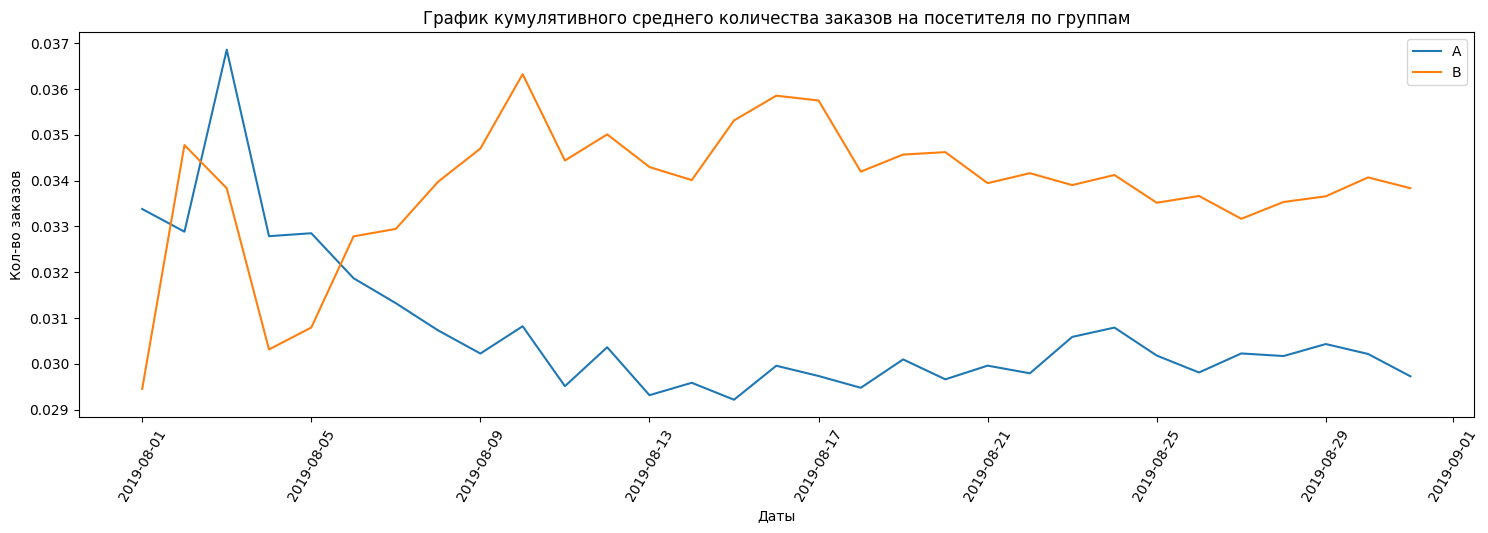

In [25]:
# Count cumulative conversion
cumulativeData['conversion'] = (
    cumulativeData['transactions'] / cumulativeData['visitors']
)
                               

# Separate data on group A
cumulativeDataA = cumulativeData[cumulativeData['group'] =='A']

# Separate data on group B
cumulativeDataB = cumulativeData[cumulativeData['group'] =='B']

# Building plots 
plt.figure(figsize=(18, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], 
label='A')

plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], 
label='B')
plt.xticks(rotation = 60)
plt.legend()
plt.xlabel('Даты')
plt.ylabel('Кол-во заказов')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.show()


График не даёт представления об итоге. По сути тут идут колебания. Возможно, в более мелком масштабе эти колебания будут выглядеть ровнее. 

В целом разница в конверсии есть. И группа B здесь в лидерах. 

## Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Выводы и предположения.
<a id='3.6.'></a>

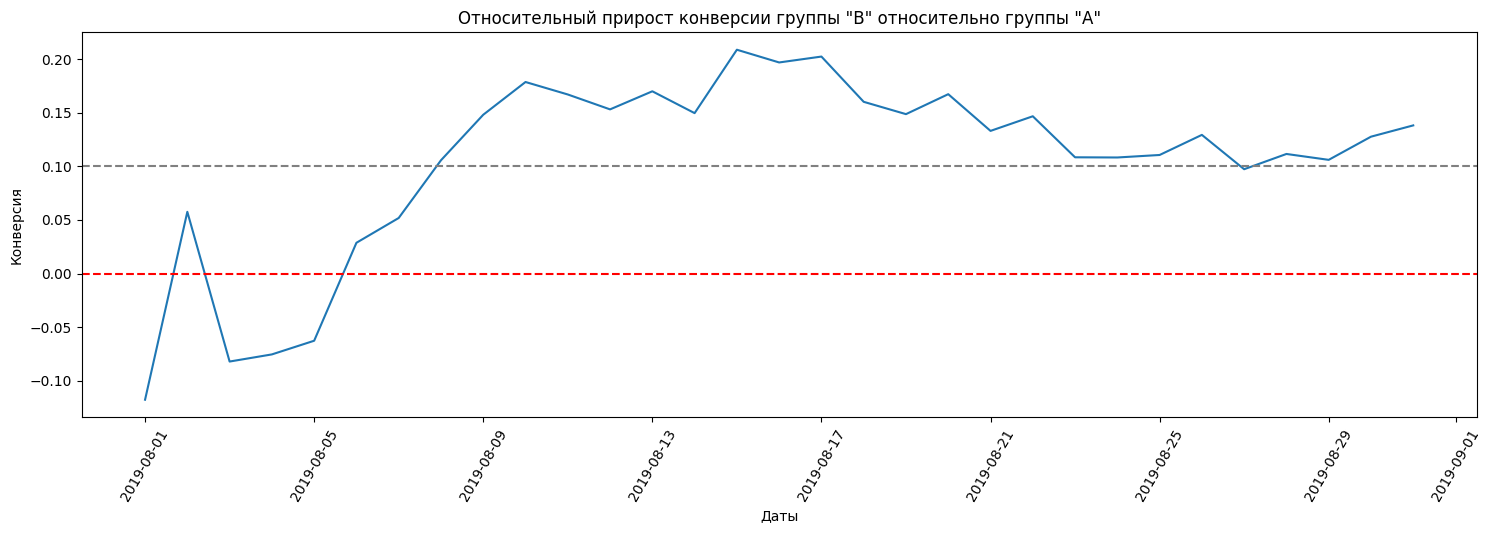

In [26]:
# Create general cumulative table
# from cumulative conversions data 
# for A & B groups

mergedCumulativeConversions = (
    cumulativeDataA[['date','conversion']]
    .merge(cumulativeDataB[['date','conversion']], 
           left_on='date', 
           right_on='date', 
           how='left', 
           suffixes=['A', 'B'])
)

# Building plot
plt.figure(figsize=(18, 5))
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']
         /mergedCumulativeConversions['conversionA']-1#,
        # label='Относительный прирост конверсии группы B относительно группы A'
        )
#plt.legend()
plt.xlabel('Даты')
plt.ylabel('Конверсия')
plt.title('Относительный прирост конверсии группы "B" относительно группы "A"')
plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=0.1, color='gray', linestyle='--')
plt.xticks(rotation = 60)
plt.show()

Конверсия по группе B заметно выше. С пятого дня идёт длительный период роста, а сама она не опускается ниже 10%. 

## Построение точечного графика количества заказов по пользователям. Выводы и предположения.

<a id='3.7.'></a>

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


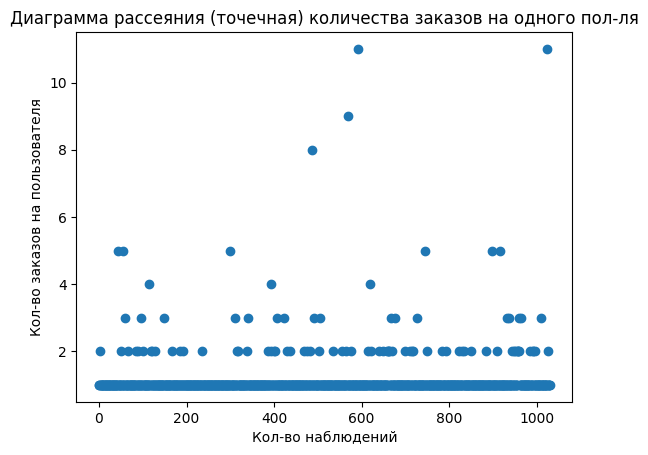

In [27]:
# Create table with sum of unique
# orders for every user
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

# Rename columns
ordersByUsers.columns = ['userId', 'orders']

# Display data
display(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

# Building scatter plot
x_values = pd.Series(range(0,len(ordersByUsers['orders'])))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Диаграмма рассеяния (точечная) количества заказов на одного пол-ля')
plt.xlabel('Кол-во наблюдений')
plt.ylabel('Кол-во заказов на пользователя')
plt.show()

In [28]:
# Count number of users
# which had over 2 orders
ordersByUsers[ordersByUsers['orders'] > 2].count()

userId    30
orders    30
dtype: int64

In [29]:
# Display all numbers from orders
ordersByUsers['orders'].unique()

array([ 1,  2,  5,  3,  4,  8,  9, 11], dtype=int64)

Мы имеем выбросы. 11, 9, 8 заказов. И по ниспадающей. Это довольно нечастые заказы. Всего же 30 пользователей сделали больше 2 заказов. Возможно, имеет смысл сделать два расчёта: с выбросами и без них. 

## Расчёт 95 и 99 перцентилей количества заказов на пользователя. Определение границы для отсева аномальных пользователей.

<a id='3.8.'></a>

In [30]:
# Calculation of screening border 

print(np.percentile(ordersByUsers['orders'], [ 95, 99]))

[2. 4.]


In [31]:
# Count number of abnormal users
len(ordersByUsers[ordersByUsers['orders'] > 2])

30

Перцентили показывают, что не более пяти процентов на пользователей с заказами от 2 и не более 1 процента на пользователей, которые совершили от 4 заказов и больше. По сути можно спокойно отсеять всех, кто сделал более 2 заказов. Это 30 заказов.

## Построение точечного графика стоимостей заказов. Выводы и предположения.

<a id='3.9.'></a>

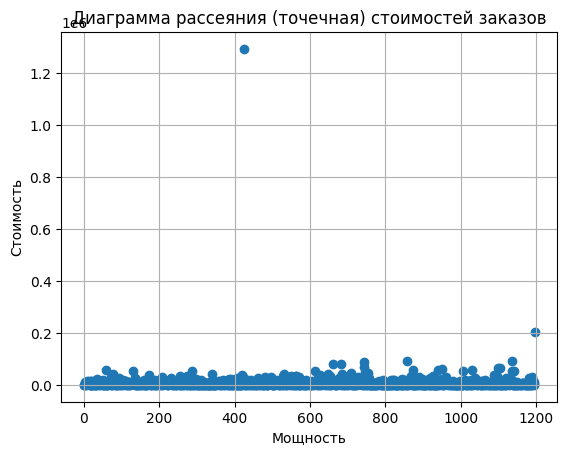

In [32]:
# Building scatter plot for
# revenue
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Диаграмма рассеяния (точечная) стоимостей заказов')
plt.grid() # for detailing look
plt.xlabel('Мощность')
plt.ylabel('Стоимость')
plt.show()




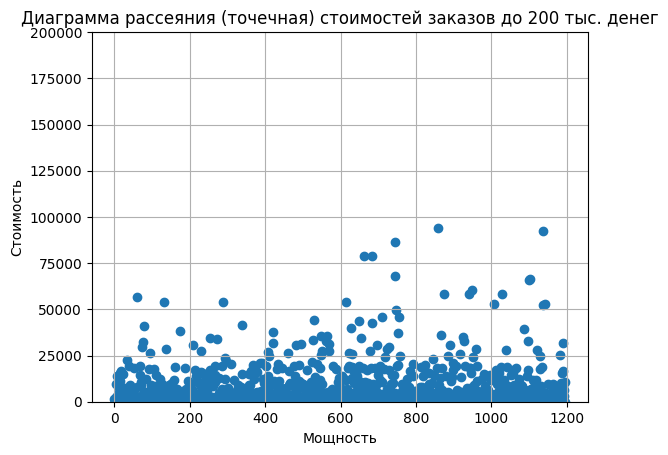

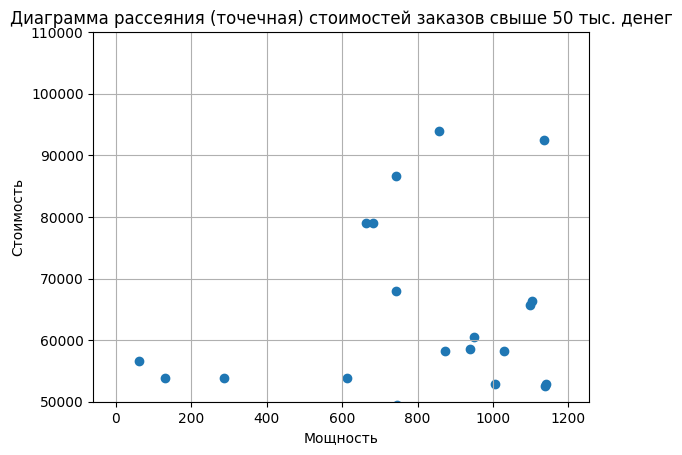

In [33]:
# Building scatter plot for
# revenue
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Диаграмма рассеяния (точечная) стоимостей заказов до 200 тыс. денег')
plt.grid() # for detailing look
plt.ylim([0, 200000])
plt.xlabel('Мощность')
plt.ylabel('Стоимость')
plt.show()

x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Диаграмма рассеяния (точечная) стоимостей заказов свыше 50 тыс. денег')
plt.grid() # for detailing look
plt.ylim([50000, 110000])
plt.xlabel('Мощность')
plt.ylabel('Стоимость')
plt.show()


In [34]:
# I want see orders over with price 50k 
orders[orders['revenue'] > 50000]

,transactionId,visitorId,date,revenue,group
60,1421016313,4256040402,2019-08-16,56650,B
131,3163614039,2254586615,2019-08-22,53904,A
287,587872075,2254456485,2019-08-24,53904,A
425,590470918,1920142716,2019-08-19,1294500,B
613,4071177889,3931967268,2019-08-07,53904,B
662,1811671147,4266935830,2019-08-29,78990,A
682,1216533772,4266935830,2019-08-29,78990,B
743,3603576309,4133034833,2019-08-09,67990,A
744,3668308183,888512513,2019-08-27,86620,B
858,192721366,1316129916,2019-08-27,93940,A


У нас не так много дорогих заказов, но один крайне сильно выбивается. Именно он в группе B дал скачок, который ранее был заметен на графике. Кроме того, есть заказы, которые тоже напоминают выбросы. На диаграмме заметно, что эти заказы в районе пятидесяти тысяч и выше. Однако их плотность невелика, а сами они разбиваются по обеим группам.

Что касается заказа с ценой выше миллиона, то есть два предположения. Это ошибка или магазин торгует чёрной икрой вёдрами. Думается, что такой заказ вполне мог быть. 

## Расчёт 95 и 99 перцентилей стоимости заказов. Определение границы для отсева аномальных заказов.

<a id='3.10.'></a>

In [35]:
# Calculation of screening border 

print(np.percentile(orders['revenue'], [ 95, 99]))

[28000.  58233.2]


In [36]:
# Count number of abnormal orders
len(orders[orders['revenue'] > 58000])

14

Что ж, не более 5% на заказы с ценой от 28000 и не более 1% занимают заказы с ценой от 58233 денег. Эти заказы будут удалены при очистке. Всего их 14.

## Подготовка данных для расчётов статистической значимости различий по "сырым" данным

<a id='3.11.'></a>

Первоначально требуется подготовить данные для расчётов. 


1. Таблицы с числом заказов для каждого пользователя, разбитые по группам.


2. Таблицами числа визитов в каждый день, разбитые по группам. 


3. Таблицы с числом заказов в день, разбитые по группам.


4. Таблицы с кумулятивными данными о числе заказов и сумме выручки, разбитые по группам.


5. Таблицы с кумулятивными данными о посещениях, разбитые по группам.


6. Таблицы, где пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [37]:
# Create two variables ordersByUsersA and ordersByUsersB 
# where will be orders amount for every user
# who made order at least once
# It's a slice by group A & B
# grouped by ID visitors without ID as index
# and counter of unique orders
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

# Rename columns 
ordersByUsersA.columns = ['userId', 'orders']

# The same as above
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']


In [38]:
# Create two frames with 
# number of visits for every day 
# and divided on groups A & B

# The slice by group with data: date & users

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]

# And rename columns
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']


In [39]:
# Create two frames with 
# number of orders for every day 
# and divided on groups A & B
# The slice by group with data: date, transactionId, users and income
# grouped by date without date as index
# and counter of unique orders plus revenue amount

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)

# And rename columns
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)

ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

In [53]:
# Create two frames with daily
# cumulative number of orders  
# and divided on groups A & B

ordersACummulative = cumulativeData[cumulativeData['group'] == 'A'][['date','transactions', 'revenue']]
ordersBCummulative = cumulativeData[cumulativeData['group'] == 'B'][['date','transactions', 'revenue']]

# And rename columns
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

In [54]:
# Create two frames with daily
# cumulative number of visitors  
# and divided on groups A & B

visitorsACummulative = cumulativeData[cumulativeData['group'] == 'A'][['date','visitors']]
visitorsBCummulative = cumulativeData[cumulativeData['group'] == 'B'][['date','visitors']]

# And rename clmns
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


In [55]:
# Create two new variables 
# for mannwhitneyu

sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(
                         visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), 
                               name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(
                         visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), 
                                name='orders')],axis=0)


## Расчёт статзначимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Выводы и предположения.

<a id='3.12.'></a>

### Проверка гипотез.
**H0**: данные по группам не различаются, количество заказов равно.

**H**1: данные отличаются, группа B показывает лучшие результаты, чем группа A. Число заказов выше.

Для оценки различий использован **U-критерий Манна — Уитни**. Уровень статистической значимости задан **0.05**.

In [56]:
alpha = .05
pvalue = stats.mannwhitneyu(sampleA, sampleB)[1]
print("p-value: {0:.3f}".format(pvalue))
print()
print("Прирост для группы B: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))
print()
if pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Невозможно отвергнуть нулевую гипотезу')

p-value: 0.017

Прирост для группы B: 0.138

Отвергаем нулевую гипотезу


1. Значение p-value меньше 0.05, а это значит, что принять нулевую гипотезу о том, что данные не отличаются, мы не можем.


2. Результат расчёта прироста показывает рост заказов в группе B относительно группы A на 13.8%, что довольно существенно. 

## Расчёт статзначимости различий в среднем чеке заказа между группами по «сырым» данным. Выводы и предположения.

<a id='3.13.'></a>

### Проверка гипотез.
**H0**: данные по группам не различаются, средние чеки равны

**H**1: данные отличаются, группа B показывает лучшие результаты, чем группа A - средний чек выше

Для оценки различий использован **U-критерий Манна — Уитни**. Уровень статистической значимости задан **0.05**.

In [57]:
alpha = .05
pvalue = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],
                       orders[orders['group']=='B']['revenue'])[1]
print('p-value: {0:.3f}'.format(pvalue))
print()
print('Прирост для группы B: {0:.3f}'.format(
    orders[orders['group']=='B']['revenue']
    .mean()/orders[orders['group']=='A']['revenue']
    .mean()-1))
print()

if pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Невозможно отвергнуть нулевую гипотезу')

p-value: 0.729

Прирост для группы B: 0.259

Невозможно отвергнуть нулевую гипотезу


1. Нулевую гипотезу отвергнуть не получилось - средние чеки равны.


2. Прирост для группы B состоавляет 25.9%, однако по всей видимости это не столь значительная разница, если гипотеза не отвергается.

## Подготовка "чистых" данных

<a id='3.14.'></a>

In [58]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 58000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])


1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
dtype: int64
31


Всего 31 человек не войдёт в "чистый" фрейм. Не так уж и много. 

In [59]:
a= ordersByUsersA[ordersByUsersA['orders'] >= 3]['userId']
b= ordersByUsersB[ordersByUsersB['orders'] >= 3]['userId']
print(len(a) + len(b))
print('Отсеяно всего, %:', 
      round(((len(a) + len(b)) / (len(ordersByUsersA['userId']) 
                                  + len(ordersByUsersA['userId'])) * 100), 1))

24
Отсеяно всего, %: 2.4


Далее нужно создать выборки, отфильтрованные по списку аномальных пользователей.

In [60]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
# Код вчистую скопирован из теории в том виде, как дан там. 

## Расчёт статзначимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Выводы и предположения.

<a id='3.15.'></a>

### Проверка гипотез.
**H0**: данные по группам не различаются, количество заказов равно.

**H**1: данные отличаются, группа B показывает лучшие результаты, чем группа A. Число заказов выше.

Для оценки различий использован **U-критерий Манна — Уитни**. Уровень статистической значимости задан **0.05**.

In [61]:
alfa = .05
pvalue = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
print("p-value: {0:.3f}".format(pvalue))
print()
print("Прирост для группы B: {0:.3f}".format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))
print()
if pvalue < alfa:
    print('Отвергаем нулевую гипотезу')
else:
    print('Невозможно отвергнуть нулевую гипотезу')


p-value: 0.010

Прирост для группы B: 0.174

Отвергаем нулевую гипотезу


По очищенным данным результат похож на первый. Гипотезу отвергаем, а прирост числа заказов есть. При этом по чистым данным он даже несколько больше - 17.4% против 13.8%.

## Расчёт статзначимости различий в среднем чеке заказа между группами по «очищенным» данным. Выводы и предположения.

<a id='3.16.'></a>

### Проверка гипотез.
**H0**: данные по группам не различаются, средние чеки равны

**H**1: данные отличаются, группа B показывает лучшие результаты, чем группа A - средний чек выше

Для оценки различий использован **U-критерий Манна — Уитни**. Уровень статистической значимости задан **0.05**.

In [62]:
alpha = .05
pvalue = stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A', 
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B', 
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])

growth = (orders[np.logical_and(
    orders['group']=='B', 
    np.logical_not(orders['visitorId']
                   .isin(abnormalUsers)))]['revenue'].mean()
                    /orders[np.logical_and(orders['group']=='A', 
                                           np.logical_not(orders['visitorId']
                                                          .isin(abnormalUsers)))]['revenue'].mean()-1)

print("p-value: {0:.3f}".format(pvalue.pvalue))
print()
print("Прирост для группы B: {0:.3f}".format(growth))
print()

if pvalue.pvalue < alfa:
    print('Отвергаем нулевую гипотезу')
else:
    print('Невозможно отвергнуть нулевую гипотезу')


p-value: 0.798

Прирост для группы B: -0.020

Невозможно отвергнуть нулевую гипотезу


По очищенным данным результат похож на первый. Гипотезу невозможно отвергнуть, так как средний чек не превышает значения контрольной группы. Сейчас же заметно, что после отсева аномалий средний чек имеет более низкие цифры и его отрицательный рост составил 2%. 

<div class="alert alert-block alert-info"> </div>

# Выводы. Решение по результатам теста. 
<a id='4.'></a>

## Приоритизация гипотез
<hr>

1. По [результату исследования](#change_hypo) первое место с точки зрения охвата пользователей занимает гипотеза **Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок**. Исходя из того, что при регистрации обычно указывается адрес электронной почты, равно как он нередко указывается для получения чека даже без регистртации, не понимаю, зачем подписки на страницы и каким образом будут получены адреса. Если я подпишусь на ВК или инстаграм, мои данные (почту) магазин не получит. Честно говоря, какая-то бредовая гипотеза. И потому **я предлагаю её отвергнуть**, как неудачно и некорретно сформулированную.

2. Гипотеза **Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа** в методе ICE занимают лишь 5-е место, но с учётом того, как много пользователей этот вариант захватит, метод RICE оценивает гипотезу на **второе по значимости место**. 

3. Гипотеза **Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей заняла** 3-е место по RICE. В то же время по ICE она была **на втором месте** с не очень большим отрывом от первого. С учётом остальных их приоритеты можно было бы посчитать почти равными. В RICE же она практически на 2/3 менее значима, чем лидирующая. Уверен, что основное дело в параметре Reach, коий равен всего 3.

Исходя из равнозначности этих гипотез в разных методах, предлагаю определиться с целями и принять в работу одну из них. Я склоняюсь ко второй, о каналах трафика. 



## Проверка результата А/В-теста
<hr>
Получены данные о двух группах покупателей. Наблюдения собраны за 1 месяц с 01.08.2019 по 01.09.2019


Разница в группах 0.99%, что позволяет считать выборки репрезентативными.


При проверке уникальности id выяснилось, что 58 пользователей есть в обеих группах. Поскольку данные о посещениях уже агрегированы, удалить без искажений результатов эти дубли невозможно. Принято решение не удалять данные. 


В ходе изучения результатов А/В-теста выяснили: 

1. Выручка в обеих группах растёт ровно.


2. Размер среднего чека в зафиксирован и не имеет тенденции к росту и падению.


3. Результаты данных "грязных" и "чистых" не совпадают в оценке среднего чека, но совпадают в оценке роста числа заказов в группе В относительно группы А. Так, "грязные" данные показывали картину, в которой средний чек в группе В намного выше. Очиста показала, что чеки примерно равны, а в группе В даже несколько ниже (-2%). 


4. Результаты приводятся на основе расчётов по "чистым" данным, где нет выбросов. На основании результатов исследования, сделали вывод, что покупки дороже 58000 денег можно отсеять, это 1% пользователей. Также отсеяли людей, совершивших более 2 покупок. Перцентили разбились так: 5% от 2 покупок, 1% от 4 покупок. Так как мы взяли до 2 покупок включительно, отсев составил 2.4%.

    4.1. Средний чек группы В имеет отрицательный рост на 2% относительно группы  А. Уровень статзначимости был установлен на 0.05, но в итоге значение 0.798, и оно немало превышает заданный уровень. Соответственно, нельзя отвергнуть гипотезу о равенстве среднего чека.
    
    4.2. Несмотря на меньший средний чек, в группе В наблюдается относительный прирост количества заказов — 17.4%. А гипотеза о том, что прироста нет - отвергается. Уровень статзначимости был установлен на 0.05, а полученное значение - 0.010. 
    
5. В группе В был значительный выброс - покупка на сумму свыше 1 млн денег. Можно ли это связывать с тестированием фичи или нет, неизвестно. Возможно, такие выбросы ещё вероятны.


По моему мнению тест можно завершить, потому что довольно длительное время результат не меняется. Нет поводов для продолжения. Уже всё ясно. 

На основании расчётов статзначимости различий как по заказам, так и по средним чекам можно зафиксировать двойной результат: прирост по числу заказов и отсутствие роста по цене среднего чека 


Рост на 17.4% это неплохой показатель, который хотелось бы зафиксировать. А если получится, и развить, и потому на мой взгляд нововведение можно применить, так как в целом за счёт роста числа заказов есть рост выручки. Однако стоит некоторое время проводить мониторинг, чтобы в итоге не получилось так, что средний чек упадёт у всех, ведь группа В показала отрицательный рост чека.


<hr>
Можно было бы сказать, что в ходе исследования также выяснили, что основная масса пользователей оформляет 1 заказ в месяц, но так ли это, если мы мониторили только месяц? 


Или, что основная масса пользователей оформляет только 1 заказ вообще. Но и этого мы не знаем. За один-то месяц.


Каких-то дополнительных, кроме целей исследования, выводов сделать не получилось. А жаль. 

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Согласен с решением. Тест прошел успешно! Среднее количество заказов увеличилось при отсутствии значимых изменений по среднему чеку -> выручка увеличилась, так как стали покупать чаще.

</div>

[top](#content)